# Principal Component Analysis on COVID-19 Pediatric Dataset

This notebook performs PCA on the COVID-19 Pediatric Dataset to identify the main components that explain the variance in the data.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_excel('COVID19 Pediatric Dataset.xlsx')
print('Dataset Shape:', df.shape)
df.head()

Dataset Shape: (5644, 111)


,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Data preprocessing
# Drop any non-numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Print the percentage of missing values for each column
missing_percentages = (numeric_df.isnull().sum() / len(numeric_df)) * 100
print("\nPercentage of missing values in each column:")
print(missing_percentages)

# Remove columns with more than 50% missing values
columns_to_keep = missing_percentages[missing_percentages < 50].index
numeric_df = numeric_df[columns_to_keep]

# Create an imputer for remaining missing values
imputer = SimpleImputer(strategy='mean')
imputed_features = imputer.fit_transform(numeric_df)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(imputed_features)

# Create a DataFrame with scaled features
scaled_df = pd.DataFrame(scaled_features, columns=numeric_df.columns)


Percentage of missing values in each column:
Patient age quantile                                      0.000000
Patient addmited to regular ward (1=yes, 0=no)            0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)     0.000000
Patient addmited to intensive care unit (1=yes, 0=no)     0.000000
Hematocrit                                               89.316088
                                                           ...    
HCO3 (arterial blood gas analysis)                       99.521616
pO2 (arterial blood gas analysis)                        99.521616
Arteiral Fio2                                            99.645641
Phosphor                                                 99.645641
ctO2 (arterial blood gas analysis)                       99.521616
Length: 74, dtype: float64


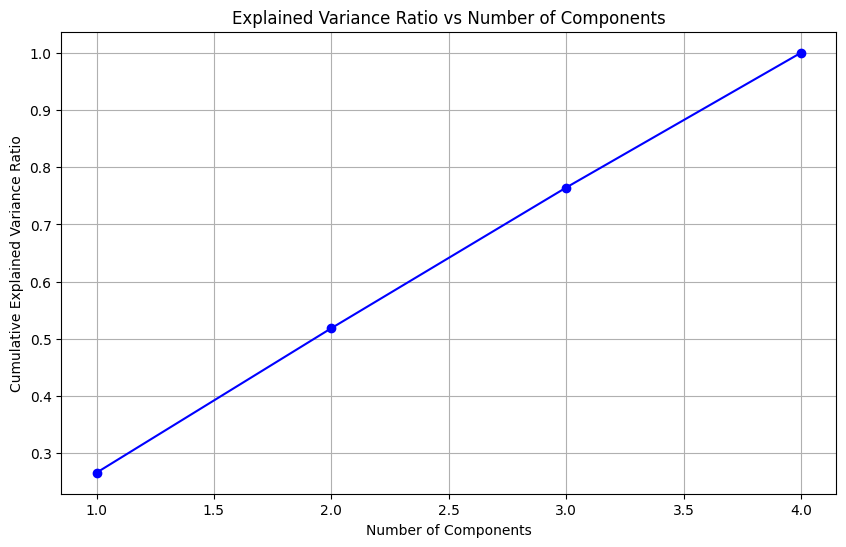


Number of components needed to explain 80% of variance: 4


In [4]:
# Perform PCA
pca = PCA()
pca_features = pca.fit_transform(scaled_features)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs Number of Components')
plt.grid(True)
plt.show()

# Print the number of components needed to explain 80% of variance
n_components_80 = np.argmax(cumulative_variance_ratio >= 0.8) + 1
print(f"\nNumber of components needed to explain 80% of variance: {n_components_80}")

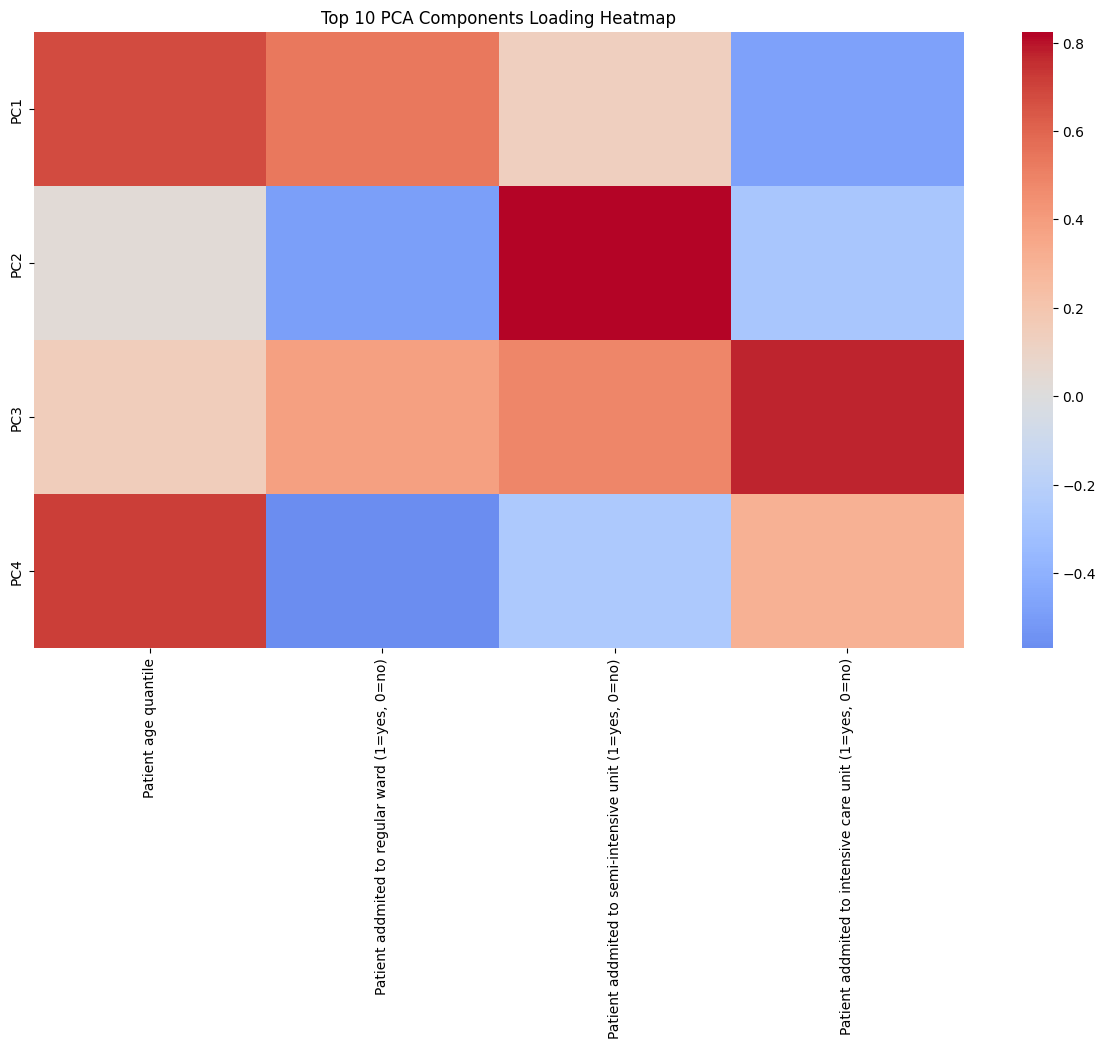

In [5]:
# Create a DataFrame with PCA results
pca_df = pd.DataFrame(
    pca.components_,
    columns=numeric_df.columns,
    index=[f'PC{i+1}' for i in range(len(pca.components_))]
)

# Plot heatmap of component loadings for top 10 components
plt.figure(figsize=(15, 8))
sns.heatmap(pca_df.iloc[:10], cmap='coolwarm', center=0)
plt.title('Top 10 PCA Components Loading Heatmap')
plt.show()

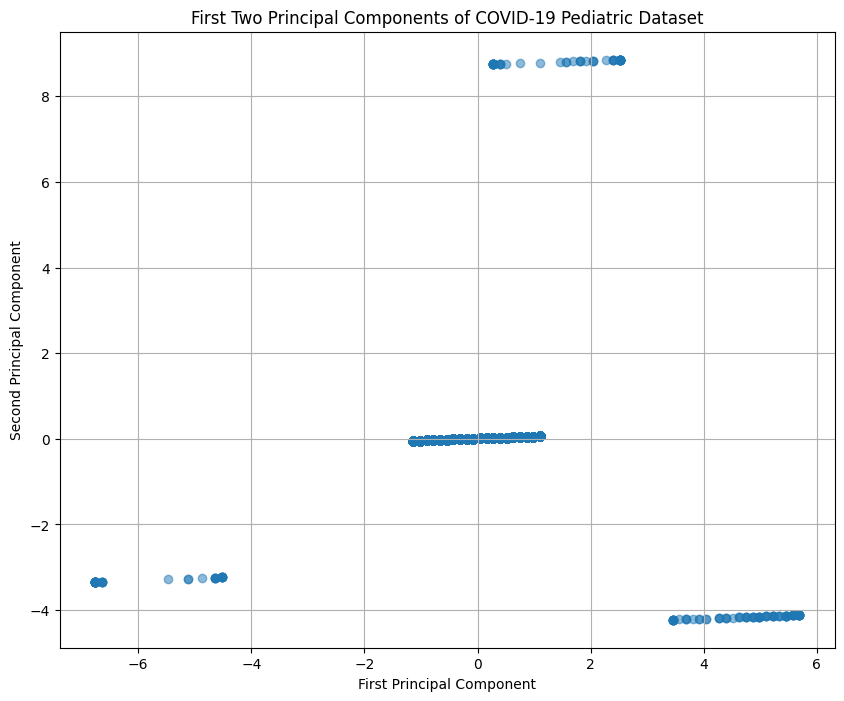

In [6]:
# Select top 2 components for visualization
pca_2d = PCA(n_components=2)
pca_2d_features = pca_2d.fit_transform(scaled_features)

# Create scatter plot of first two principal components
plt.figure(figsize=(10, 8))
plt.scatter(pca_2d_features[:, 0], pca_2d_features[:, 1], alpha=0.5)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('First Two Principal Components of COVID-19 Pediatric Dataset')
plt.grid(True)
plt.show()